In [2]:
%load_ext autoreload
%autoreload 2

from DynamicModel import *
from ReviewModel import ReviewModel
from dataLoader import *

In [3]:
import numpy as np
import torch

In [24]:
inputs.shape

torch.Size([29700, 60])

In [28]:
summary(model,torch.LongTensor([1,29700, 60]))

TypeError: iteration over a 0-d tensor

In [10]:
import matplotlib.pyplot as plt
def plot_losses(tr_loss, val_loss):
    plt.plot(tr_loss, label="training")
    plt.plot(val_loss, label="validation")
    plt.legend()
    plt.show()

9776


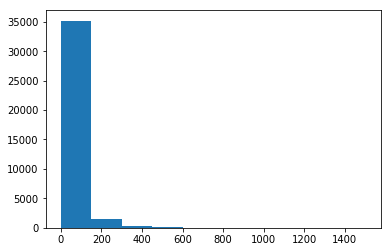

In [4]:
data_loader = AmznDataLoader( path ='./data/reviews_Amazon_Instant_Video_5.json.gz', maxSeqLength = 60)

In [5]:
ReviewModelParam = {
    "max_length": 60,
    "embedding_dim": 50,
    "vocab_length" : data_loader.weight_matrix.shape[0],
    "output_dim" : 5,
    "batch_size" : 128,
    
    "first_dropout" : 0.5,
    "conv_input_channel": None,
    "conv_output_channel" : 200,
    "conv_padding" : 2,
    "conv1_kernel_size" : 4,
    "conv2_kernel_size" : 5,
    "maxpool_kernel_size" : 2,
    "second_dropout" : 0.3,
    "rnn_input_size": None,
    "rnn_hidden_size" : 100,
    "rnn_num_layers" : 1,
    "first_dense_in":None,
    "first_dense_out" : 400,
    "third_dropout" : 0.15,
    "second_dense_in" : None,
    "second_dense_out" : None
    }

ReviewModelParam["conv_input_channel"] = ReviewModelParam["embedding_dim"]
ReviewModelParam["rnn_input_size"] = ReviewModelParam["conv_output_channel"]*2
ReviewModelParam["first_dense_in"] = ReviewModelParam["max_length"]//2 * ReviewModelParam["rnn_hidden_size"]
ReviewModelParam["second_dense_in"] = ReviewModelParam["first_dense_out"]
ReviewModelParam["second_dense_out"] = ReviewModelParam["output_dim"]  ##depends on loss function


In [6]:
from skorch import NeuralNetClassifier
import torch.optim as optim
from skorch.callbacks import EpochScoring,LRScheduler, EarlyStopping

In [7]:
callbacks = [
    ('es1',EpochScoring('accuracy')),
    ('lrs',LRScheduler()),
    ('est',EarlyStopping()),
    
]
batch_size = 128
device = torch.device("cuda")
model = ReviewModel(ReviewModelParam).to(device)
#model = DynamicModel(batch_size,parameter_dict=SST1_DATASET_PARAMETERS).to(device)
net = NeuralNetClassifier(model,## change dimensionality
                          iterator_train__drop_last = True,
                          iterator_valid__drop_last = True, 
                          iterator_train__shuffle = True,
                          iterator_valid__shuffle = True,
                          max_epochs=100, 
                          criterion = nn.CrossEntropyLoss, 
                          #criterion__weight = weight, 
                          optimizer=optim.Adam,
                          lr = 0.01,
                          # optimizer__param_groups = {('momentum', 0.3)},
                          batch_size = batch_size,
                          callbacks = callbacks,
                          device = device,verbose = 1
                          )


In [18]:
inputs = torch.from_numpy(data_loader.X_train).long().to(device)
labels = torch.tensor(data_loader.y_train.values).long().to(device)
net.fit(inputs, labels)

  epoch    accuracy    train_loss    valid_acc    valid_loss      dur
-------  ----------  ------------  -----------  ------------  -------
      1      0.5617        4.3914       0.5617        1.2019  31.8914
      2      0.5615        1.2021       0.5615        1.2045  31.7745
      3      0.5620        1.2027       0.5620        1.2032  31.7833
      4      0.5613        1.2031       0.5613        1.2021  32.0704
      5      0.5618        1.2028       0.5618        1.2017  33.7759
      6      0.5625        1.2027       0.5625        1.2012  31.9389
      7      0.5618        1.2024       0.5618        1.2021  31.8940
      8      0.5625        1.2031       0.5625        1.2008  31.8915
      9      0.5623        1.2021       0.5623        1.2018  31.8913
     10      0.5606        1.2020       0.5606        1.2034  31.8930
     11      0.5623        1.2020       0.5623        1.2014  31.9004
     12      0.5617        1.2031       0.5617        1.2048  31.9013
     13      0.5635 

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=ReviewModel(
    (embedding): Embedding(52656, 50)
    (drop1): Dropout(p=0.5)
    (conv1): Conv1d(50, 200, kernel_size=(4,), stride=(1,), padding=(2,))
    (conv2): Conv1d(50, 200, kernel_size=(5,), stride=(1,), padding=(2,))
    (maxpool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (drop2): Dropout(p=0.3)
    (rnn): GRU(400, 100)
    (flatten): Flatten()
    (fc1): Linear(in_features=3000, out_features=400, bias=True)
    (drop3): Dropout(p=0.15)
    (fc2): Linear(in_features=400, out_features=5, bias=True)
  ),
)

In [19]:
inputs = torch.from_numpy(data_loader.X_train).long().to(device)
inputs.shape

torch.Size([29700, 60])

In [10]:
import 29700, 60
modela = models.vgg16()
print(modela)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [ ]:
from torchsummary import summary
summary(model,torch.LongTensor(inputs.size()))

In [8]:
# save model
with open("model.pkl", 'wb') as f:
    pickle.dump("model",f)
   
# load model
with open("model.pkl","rb") as f: 
    model = pickle.load(f)

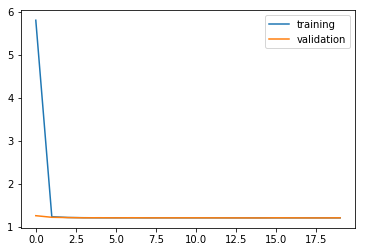

In [16]:
#todo plot losses
#todo plot accuracy
#todo confusion matrix
history = net.history
train_losses = history[:, 'train_loss']
valid_losses = history[:, 'valid_loss']

accuracy = history[:, 'accuracy']
plot_losses(train_losses, valid_losses)

In [ ]:
SST2_DATASET_PARAMETERS = {
    "cell_one_parameter_dict" : {
        "sent_length": 19,
        "conv_kernel_size": (7, 1),
        "conv_input_channels": 1,
        "conv_output_channels": 6,
        "conv_stride": (1, 1),
        "k_max_number": 10,
        "folding_kernel_size": (1, 2),
        "folding_stride": (1, 2)
    },
    "cell_two_parameter_dict" : {
        "sent_length": None,
        "conv_kernel_size": (5, 1),
        "conv_input_channels": 6,
        "conv_output_channels": 14,
        "conv_stride": (1, 1),
        "k_max_number": 4,
        "folding_kernel_size": (1, 2),
        "folding_stride": (1, 2)
    },
    "dropout_rate": 0.5,
    "embedding_dim": 50,
    "vocab_length": data_loader.weight_matrix,
    "output_dim": 2
}
SST2_DATASET_PARAMETERS["cell_two_parameter_dict"]["sent_length"] = SST2_DATASET_PARAMETERS["cell_one_parameter_dict"]["k_max_number"]

In [20]:
np.count_nonzero(data_loader.X_train)/(data_loader.X_train.shape[0]*data_loader.X_train.shape[1])

0.43053086419753084

In [22]:
data_loader.weight_matrix

(52656, 50)

In [23]:
data_loader.X_train.shape
# data_loader.buildCorpus()

(29700, 60)

In [7]:
weight_matrix = data_loader.weight_matrix
import sys
print(sys.getsizeof(weight_matrix)/(2**20))

# print(weight_matrix[0])
# print(weight_matrix.shape)

20.086776733398438


In [8]:
pickle.dump(weight_matrix,  open('./data/GloveMatrix.npy', 'wb'))

In [9]:
from collections import Counter
c = Counter(data_loader.y_train)

In [10]:
[(i, c[i]/len(data_loader.y_train)*100) for i in c]

[(3.0, 22.757575757575758),
 (4.0, 56.18518518518518),
 (0.0, 4.562289562289562),
 (2.0, 11.26936026936027),
 (1.0, 5.225589225589226)]

In [11]:
weight = Variable(torch.cuda.FloatTensor([0.4,0.5,0.11,0.23,0.56])) 

In [12]:
from skorch.callbacks import EpochScoring,LRScheduler, EarlyStopping

In [13]:
# from sklearn.model_selection import GridSearchCV

In [16]:
# params = {
#     'lr': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9],
#     'max_epochs': list(range(10,100,20))
# }
# gs = GridSearchCV(net, params, refit = False, scoring = 'accuracy',verbose = 1)


In [20]:
inputs = torch.from_numpy(data_loader.X_train).long().to(device)
labels = torch.tensor(data_loader.y_train.values).long().to(device)
net.fit(inputs, labels)

RuntimeError: CUDA error: device-side assert triggered

In [ ]:
# save model
with open("model.pkl", 'wb') as f:
    pickle.dump("model",f)
    
    

In [ ]:
with open("model.pkl","rb") as f: 
    model = pickle.load(f)

In [ ]:
import matplotlib.pyplot as plt
def plot_losses(tr_loss, val_loss):
    plt.plot(tr_loss, label="training")
    plt.plot(val_loss, label="validation")
    plt.legend()
    plt.show()

In [ ]:
#todo plot losses
#todo plot accuracy
#todo confusion matrix
history = net.history
train_losses = history[:, 'train_loss']
valid_losses = history[:, 'valid_loss']

accuracy = history[:, 'accuracy']
plot_losses(train_losses, valid_losses)

In [49]:
SST1_DATASET_PARAMETERS = {
    "cell_one_parameter_dict" : {
        "sent_length": 60,
        "conv_kernel_size": (10, 1),
        "conv_input_channels": 1,
        "conv_output_channels": 6,
        "conv_stride": (1, 1),
        "k_max_number": 9,
        "folding_kernel_size": (1, 2),
        "folding_stride": (1, 2)
    },
    "cell_two_parameter_dict" : 
        "sent_length": None,
        "conv_kernel_size": (7, 1),
        "conv_input_channels": 6,
        "conv_output_channels": 12,
        "conv_stride": (1, 1),
        "k_max_number": 5,
        "folding_kernel_size": (1, 2),
        "folding_stride": (1, 2)
    },
    "dropout_rate": 0.5,
    "embedding_dim": 50,
    "vocab_length": data_loader.weight_matrix.shape[0],
    "output_dim": 5
}
SST1_DATASET_PARAMETERS["cell_two_parameter_dict"]["sent_length"] = SST1_DATASET_PARAMETERS["cell_one_parameter_dict"]["k_max_number"]
